<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

<a id="BS"></a><h1 style="text-align:center;">Hawkes process simulation</h1>

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>


We consider a Hawkes process $N$ with intensity
$$
\lambda_t = g_0(t) + \int_0^t K(t-s) dN_s.
$$
Its integrated intensity $U_t := \int_0^t \lambda_s ds$ can be written as
$$
U_t = \int_0^t g_0(s) ds + \int_0^t K(t-s) (U_sds + Z_s ds),
$$
where $Z := N - U$ is a martingale with $\langle Z \rangle = U$ and $K$ is a locally integrable kernel ($L^1([0,T])$, not necessarily $L^2$). We will take:
$$ g_0(t) \equiv \mu, $$
with $\mu \geq 0$.

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

<a id="BS"></a><h1 style="text-align:center;">The scheme </h1>

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>


Define
$$ U_{t,s} := U_s - U_t, \quad Z_{t,s}  = Z_s - Z_t, \quad t\leq s, $$
and
$$ g_t(s) := g_0(s) + \int_0^t K(s-u) (dU_{0,u} + dZ_{0,u}), \quad t < s .$$
When we write $dZ_{t,u}$ we mean differential in the second variable $u$.  (In case of square integrable kernel, $g_t(s) = \mathbb E[ \lambda_s | \mathcal F_t]$.)

The dynamics of $U$ can be written in the form
$$ U_{t,s} = \int_t^s g_t(u) du +  \int_t^s K(s-u) (U_{t,u}du + Z_{t,u} du)  $$

We are simply going to discretize the second integral appearing  using a right-point  approximation
$$
\int_t^s K(s-u) (b U_{t,u} + c Z_{t,u} du) \approx \int_t^s K(s-u) du (U_{t,s} + Z_{t,s}) = \int_0^{t-s} K(u) du  (U_{t,s} + Z_{t,s})
$$


This leads to the scheme
$$
U_{i,i+1}  = \alpha_i + \bar K_{\Delta t}  U_{i,i+1} + \bar K_{\Delta t} Z_{i,i+1}
$$
with
$$ \alpha_i =  \int_{t_i}^{t_{i+1}} g_{t_i}(u) du, \quad   \bar K_{\Delta t} = \int_0^{\Delta t} K(u) du  $$

This means that, at time $t$ since we have access to $\alpha_i$, all we need to know to obtain $U_{i,i+1}$ is to simulate a random variable $U$ following the **Inverse Gaussian** distribution
$$ U \sim IG ( \alpha, (\alpha/\sigma)^2 )  $$
See https://en.wikipedia.org/wiki/Inverse_Gaussian_distribution

__TODO__: add motivation via the CF

The link $Z_{i, i+1} = \tilde W_{U_{i, i+1}}$ is absent for discontinuous processes, however, one can use the fact that $U_{i, i+1}$ is the integrated intensity of the process $N$ over $[t_i, t_{i+1}]$, so that the conditional law
$$
\mathcal{L}(N_{i, i+1} | U_{i, i+1}) \sim \mathcal{P}(U_{i, i+1}),
$$
and $N_{i, i+1}$ can be simulated _exactly_ once $U_{i, i+1}$ is known.

# Developping expression of $\alpha_i$
$$ \alpha_i =  \int_{t_i}^{t_{i+1}} g_{t_i}(s) ds = \int_{t_i}^{t_{i+1}} g_{0}(s) ds  + \int_{t_i}^{t_{i+1}} \int_0^{t_{i}} K(s-u) (dU_{0,u} + dZ_{0,u})  du ds $$
Now we observe that $d{Z_{0,u}} = dZ_{t_j,u}$ whenever, $t_j\leq u$ (similar for $U$) so that we can write:
$$   \int_0^{t_{i}} K(s-u) (dU_{0,u} + dZ_{0,u}) = \sum_{j=0}^{i-1} \int_{t_{j}}^{t_{j+1}} K(s-u)  (dU_{{t_j},u} + dZ_{{t_j},u}),   $$
so that an application of Fubini yields
$$ \alpha_i =  \int_{t_i}^{t_{i+1}} g_{t_i}(s) ds = \sum_{j=0}^{i-1}  \int_{t_{j}}^{t_{j+1}}  \left(  \int_{t_i}^{t_{i+1}}  K(s-u)ds \right) (dU_{t_{j},u} +  dZ_{t_j,u})  du \approx \sum_{j=0}^{i-1} \bar K_{ij}  \int_{t_{j}}^{t_{j+1}}  (dU_{t_{j},u} + dZ_{t_j,u})  du = \sum_{j=0}^{i-1}  \bar K_{ij} (U_{t_{j},t_{j+1}} + Z_{t_{j},t_{j+1}})   ,  $$
with

$$ \bar K_{ij}:= \int_{t_i}^{t_{i+1}} K(s-t_j) ds, \quad j = 0,1, \ldots, i-1. $$

# Scheme



Fix $t_0 = 0 < t_1 < \ldots < t_n = T$ a partition and  construct $(Z_{j,j+1})_{i=0,\ldots, n}$ and $(U_{i,i+1})_{i=0,\ldots, n-1}$  recursively. For each $i=0,\ldots, N-1$
First we compute $\alpha_i$
$$ \alpha_{i}  = \int_{t_i}^{t_{i+1}} g_0(s) ds + \sum_{j=0}^{i-1}   \bar K_{ij} (U_{j,j+1}  +  Z_{j,j+1})  $$
with an initialization (for $i=0$) to $\alpha_0=\int_0^{t_1} g_0(s) ds$ and
$$ \bar K_{ij}:= \int_{t_i}^{t_{i+1}} K(s-t_j) ds, \quad j = 0,1, \ldots, i-1. $$

we  first simulate  (here we need $1- \bar K_{\Delta t}\geq 0$)
$$ U_{i,i+1} \sim IG \left(\frac{\alpha_i}{ 1 - \bar K_{\Delta t}}, \left(\frac{\alpha_i}{\bar K_{\Delta t}}\right)^2 \right) $$
and then, we simulate 
$$
N_{i, i+1} \sim \mathcal{P}(U_{i,i+1}),
$$ 
and set $Z_{i, i+1} = N_{i, i+1} - U_{i,i+1}$.

# Fractional kernel
$$K(t)=\frac{t^{H-1/2}}{\Gamma(H+0.5)} , \quad H \in (-1/2, 1/2], \quad g_0(t) = \mu.$$

We denote 

$$
\bar K(t) := \int_0^t K(s) ds = \dfrac{t^{H + 0.5}}{\Gamma(H+1.5)}, \quad \bar g_0(t) := \int_0^t g_0(s) ds = \mu t.
$$

The following quantities need to be computed with:

$$ \int_{t_i}^{t_{i+1}} g_0(s) ds = \bar g_0(t_{i+1}) - \bar g_0(t_{i})$$
$$  \bar K_{\Delta t} = \bar K(\Delta t), \quad i =0, \ldots, n.$$
$$ \bar K_{ij} = \int_{t_i - t_j}^{t_{i+1} - t_j} K(u) du  = \bar K(t_{i+1} - t_j) - \bar K(t_i - t_j), \quad j = 0, \ldots i-1, \quad  i =1, \ldots, n.$$

In [1]:
%load_ext autoreload
%autoreload 2
import sys
if "../" not in sys.path:
    sys.path.append("../")

import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
from scipy.special import gamma
from scipy.stats import ks_2samp, kstest

from volterra_hawkes.iVi.iVi_hawkes import IVIHawkesProcess
from volterra_hawkes.kernel.exponential_kernel import ExponentialKernel
from volterra_hawkes.kernel.constant_kernel import ConstantKernel
from volterra_hawkes.kernel.fractional_kernel import FractionalKernel
from volterra_hawkes.kernel.gamma_kernel import GammaKernel

color_cycle = ["#B56246", "#579F40", "#9A46B5", "#4699B5", "#B54662", "#D4A017", "#5b6c64", "#71074E", "#0033A0"]
plt.rcParams["figure.figsize"]        = ((1 + np.sqrt(5)) / 2 * 5, 5)
plt.rcParams["figure.autolayout"]     = True
plt.rcParams["patch.force_edgecolor"] = False
plt.rcParams["axes.grid"]             = True
plt.rcParams['axes.prop_cycle']       = matplotlib.cycler(color=color_cycle)

### Hawkes process simulation

In [2]:
mu = 0.7

def g0_const(t, mu=mu):
    return mu * np.ones_like(t)

def g0_bar_const(t, mu=mu):
    return mu * t

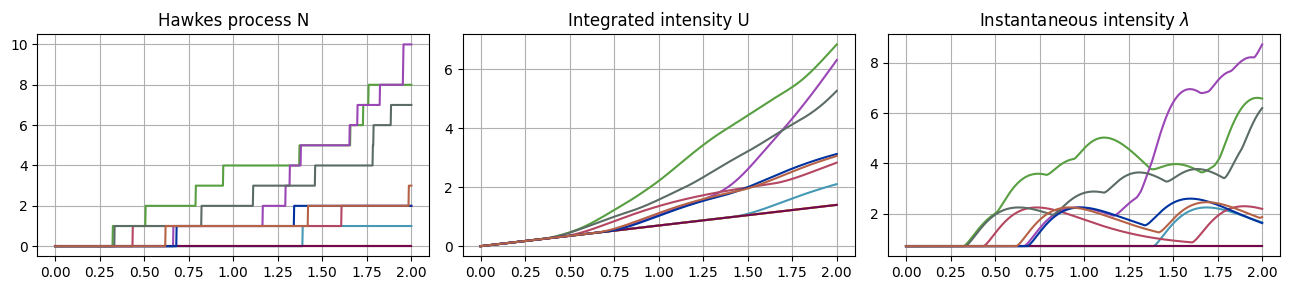

In [3]:
H = -0.1
lam = 5
c = 0.95
alpha = 2.5

T = 2
n_steps = 1000
n_paths = 10

t_grid = np.linspace(0, T, n_steps + 1)

rng = np.random.default_rng(seed=42)

# K = FractionalKernel(H=H, c=c)
# K = ExponentialKernel(c=c, lam=lam)
K = GammaKernel(lam=lam, alpha=alpha, c=lam**alpha)
ivi_hawkes = IVIHawkesProcess(kernel=K, g0_bar=g0_bar_const, rng=rng, g0=g0_const)
N, U, lam = ivi_hawkes.simulate_on_grid(t_grid=t_grid, n_paths=n_paths)

fig, ax = plt.subplots(1, 3, figsize=(13, 3))
n_show = n_paths

ax[0].plot(t_grid, N[:, 0:n_show])
ax[0].set_title('Hawkes process N')
ax[0].grid("on")

#ax[1].plot(t_grid, U[:,0:n_show])
ax[1].plot(t_grid, U[:,0:n_show])
ax[1].set_title('Integrated intensity U')
ax[1].grid("on")

#ax[2].plot(t_grid[1:], dU[:, 0:n_show] / np.diff(t_grid).reshape((-1, 1)))
ax[2].plot(t_grid, lam[:,0:n_show])
ax[2].set_title('Instantaneous intensity $\lambda$')
ax[2].grid("on")

plt.show()

# Sanity check

To check the proposed simulation algorighm, we compute the empirical means over the simulated trajectories of $N$ and $U$.

Note that
$$
\mathbb{E}[N_t] = \mathbb{E}[U_t] =: m_t,  
$$
where $m$ satisfies the Fredholm's equation
$$
m_t = \bar g_0(t) + \int_0^tK(t - s)m_sds,
$$
and hence,
$$
m_t = \bar g_0(t) + \int_0^tR(t - s) g_0(s)ds,
$$
where $R$ is the resolvent of $K$ satisfying
$$
R * K = K * R = R - K.
$$

For instance, the resolvent corresponding to the fractional kernel is given by
$$
R(t) = t^{\alpha - 1} E_{\alpha, \alpha}(t^\alpha), \quad \alpha = H + 0.5,
$$
where $E_{\alpha, \beta}$ denotes the Mittag–Leffler function
$$
E_{\alpha, \beta}(z) = \sum_{n \geq 0}\dfrac{z^n}{\Gamma(\alpha n + \beta)}.
$$

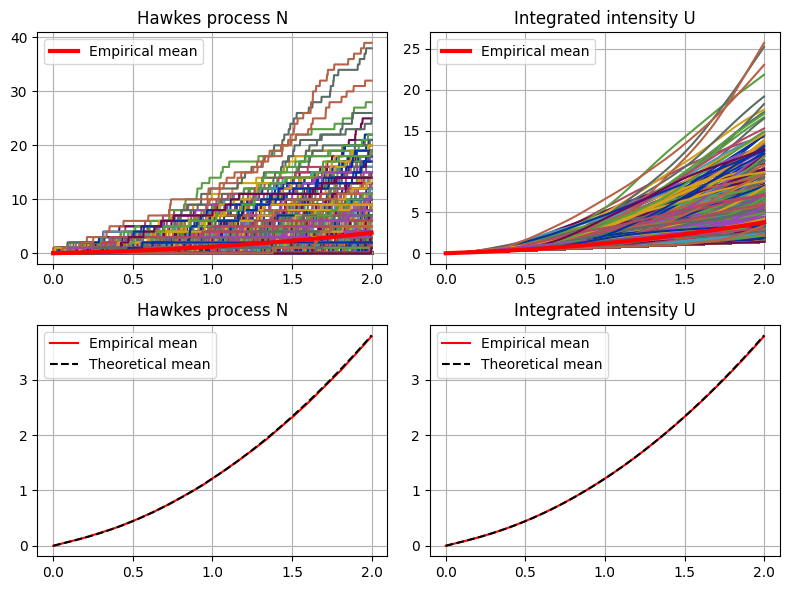

In [4]:
rng = np.random.default_rng(seed=42)
ivi_hawkes = IVIHawkesProcess(kernel=K, g0_bar=g0_bar_const, rng=rng, g0=g0_const)

expected_U = ivi_hawkes.U_mean(t_grid=t_grid)

n_show = 1000
n_paths = 10000

N, U, lam = ivi_hawkes.simulate_on_grid(t_grid=t_grid, n_paths=n_paths)

fig, ax = plt.subplots(2, 2, figsize=(8, 6))

ax[0, 0].plot(t_grid, N[:, 0:n_show])
ax[0, 0].plot(t_grid, N.mean(axis=1), "r", lw=3, label="Empirical mean")
ax[0, 0].set_title('Hawkes process N')
ax[0, 0].legend()
ax[0, 0].grid("on")

ax[0, 1].plot(t_grid, U[:,0:n_show])
ax[0, 1].plot(t_grid, U.mean(axis=1), "r", lw=3, label="Empirical mean")
ax[0, 1].set_title('Integrated intensity U')
ax[0, 1].legend()
ax[0, 1].grid("on")

ax[1, 0].plot(t_grid, N.mean(axis=1), "r", label="Empirical mean")
ax[1, 0].plot(t_grid, expected_U, "k--", label="Theoretical mean")
ax[1, 0].set_title('Hawkes process N')
ax[1, 0].legend()
ax[1, 0].grid("on")

ax[1, 1].plot(t_grid, U.mean(axis=1), "r", label="Empirical mean")
ax[1, 1].plot(t_grid, expected_U, "k--", label="Theoretical mean")
ax[1, 1].set_title('Integrated intensity U')
ax[1, 1].legend()
ax[1, 1].grid("on")

plt.show()

## Simulation of the jump moments

In [113]:
H = -0.1
lam = 2
c = 0.95
alpha = 2.5

T = 10
n_steps = 10000
n_paths = 1

t_grid = np.linspace(0, T, n_steps + 1)

rng = np.random.default_rng(seed=42)


K = FractionalKernel(H=H, c=c)
# K = ExponentialKernel(lam=lam, c=c)
# K = GammaKernel(lam=lam, alpha=alpha, c=lam**alpha * 0.95)

ivi_hawkes = IVIHawkesProcess(kernel=K, g0_bar=g0_bar_const, rng=rng, g0=g0_const)

In [114]:
%%time
ivi_hawkes.rng = np.random.default_rng(seed=42)
t_grid = np.linspace(0, T, n_steps + 1)
N_jumps = ivi_hawkes.simulate_arrivals(t_grid=t_grid, n_paths=n_paths)
N_jumps[0].shape

CPU times: total: 8.02 s
Wall time: 10.4 s


(1877,)

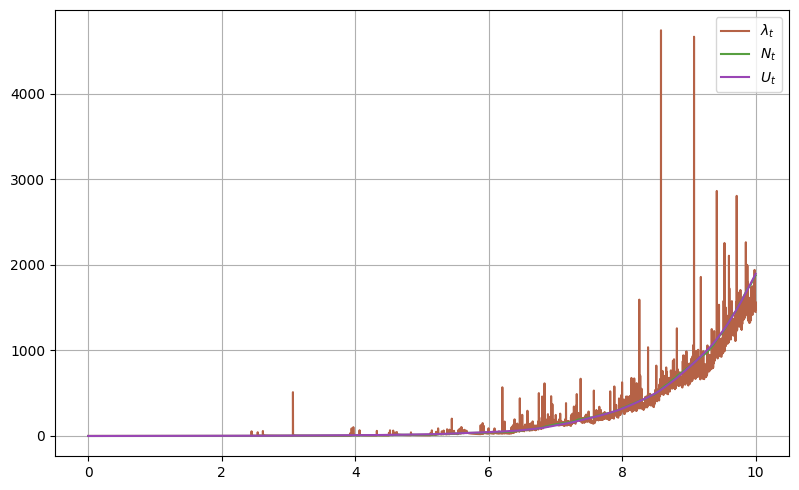

In [116]:
idx = 0

t_grid_fine = np.linspace(0, T, 10**4)
plt.plot(t_grid_fine, ivi_hawkes.lam_from_jumps(t_grid_fine, N_jumps[idx]), label="$\lambda_t$")
plt.plot(t_grid_fine, ivi_hawkes.N_from_jumps(t_grid_fine, N_jumps[idx]), label="$N_t$")
plt.plot(t_grid_fine, ivi_hawkes.U_from_jumps(t_grid_fine, N_jumps[idx]), label="$U_t$")
# plt.plot(t_grid_fine, ivi_hawkes.lam_from_jumps(t_grid_fine, N_jumps[idx]), label="$\lambda_t$")
plt.legend()

In [117]:
from scipy.stats import expon
import statsmodels.api as sm

def poisson_jumps_test(jumps):
    data = np.diff(jumps, prepend=0)
    data_unif = 1 - np.exp(-data)

    # Compute theoretical quantiles (from an Exponential(1) distribution)
    n = len(data)
    empirical_quantiles = np.sort(data)
    theoretical_quantiles = expon.ppf((np.arange(1, n+1) - 0.5) / n, scale=1.0)  # Inverse CDF (percent-point function)

    # Q-Q plot
    fig, ax =  plt.subplots(2, 2, figsize=(9, 8))
    ax[0, 0].scatter(theoretical_quantiles, empirical_quantiles, label="Observed vs. Exponential", s=10)
    ax[0, 0].plot(theoretical_quantiles, theoretical_quantiles, c=color_cycle[1], linestyle="dashed", label="y = x")

    ax[0, 0].set_xlabel("Theoretical Quantiles (Exponential)")
    ax[0, 0].set_ylabel("Empirical Quantiles (Data)")
    ax[0, 0].set_title("Q-Q Plot Against Exponential Distribution")
    ax[0, 0].legend()

    ax[0, 1].scatter(data_unif[:-1], data_unif[1:], s=10)
    ax[0, 1].set_title(r"$(e^{-\tau_i}, e^{-\tau_{i+1}})$")
        
    x_grid = np.linspace(data.min(), data.max(), num=1000)
    ecdf = sm.distributions.ECDF(data)
    ax[1, 0].plot(x_grid, ecdf(x_grid), label="ECDF")
    ax[1, 0].plot(x_grid, 1 - np.exp(-x_grid), "--", label="Exact CDF")
    ax[1, 0].set_title("Empirical CDF")
    ax[1, 0].legend()

    x_grid = np.linspace(0, np.max(data), 1000)
    ax[1, 1].hist(data, bins=20, density=True, alpha=0.4)
    ax[1, 1].plot(x_grid, np.exp(-x_grid), label="PDF")
    ax[1, 1].set_title("Histogram")
    ax[1, 1].legend()

    print("Kolmogorov-Smirnov test p-value: ", kstest(rvs=data, cdf=lambda x: 1 - np.exp(-x)).pvalue)
    
    plt.show()

Kolmogorov-Smirnov test p-value:  0.0011228659761573338


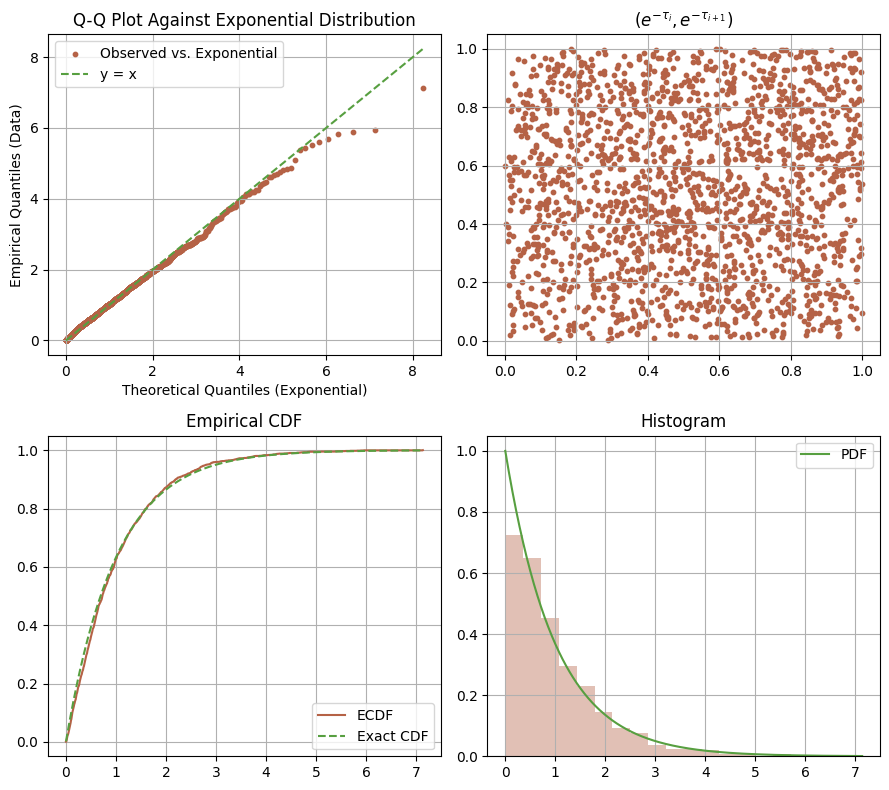

In [118]:
poisson_jumps_test(ivi_hawkes.U_from_jumps(N_jumps[idx], N_jumps[idx]))

## Benchmarking to the exact methods

#### Population approach
__Goal__: simulate exactly the jump times of the Hawkes process on $[0, T]$.

1. Simulate an inhomogeneous Poisson process with intensity $g_0(t)$ via thinning, denote each jump times by $t_1^0, \ldots, t_N^0$.
2. For each $t_i^0$, simulate the descendants on $[t_i^0, T]$ as the arrivals of inhomogeneous Poisson process with intensity $\bar K(t - t_i^0)$. It can be done exactly if $\bar K$ is inversible: simulate a Poisson field on $[0, \bar K(T - t_i^0)]$, apply $\bar K^{-1}$ and shift by $t_i^0$. This gives the first generation of descendants of $t_i^0$.
3. Repeat the previous step for all newly simulated points until no descendents are generated.

- Compare marginal laws of $N_T$ and $U_T$
- Compare the characteristic funcitons

In [119]:
from volterra_hawkes.point_processes.hawkes import simulate_hawkes, simulate_hawkes_ogata

In [120]:
kernel = ivi_hawkes.kernel
rng = np.random.default_rng(seed=42)
g0_upper_bound = mu

In [121]:
%%time
rng = np.random.default_rng(seed=41)
hawkes_arrivals = simulate_hawkes(T=T, g0=g0_const, g0_upper_bound=mu, kernel=kernel, rng=rng)
print("N_T =", len(hawkes_arrivals))

N_T = 21577
CPU times: total: 484 ms
Wall time: 887 ms


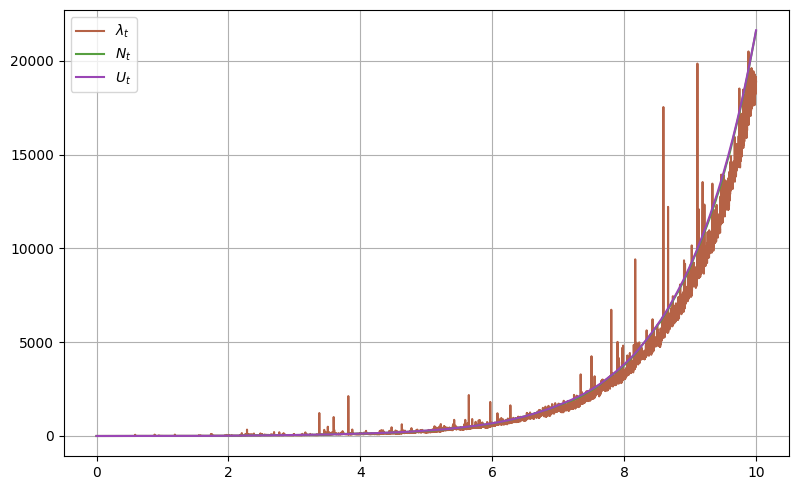

In [122]:
plt.plot(t_grid_fine, ivi_hawkes.lam_from_jumps(t_grid_fine, hawkes_arrivals), label="$\lambda_t$")
plt.plot(t_grid_fine, ivi_hawkes.N_from_jumps(t_grid_fine, hawkes_arrivals), label="$N_t$")
plt.plot(t_grid_fine, ivi_hawkes.U_from_jumps(t_grid_fine, hawkes_arrivals), label="$U_t$")
plt.legend()

Kolmogorov-Smirnov test p-value:  0.6879786157008385


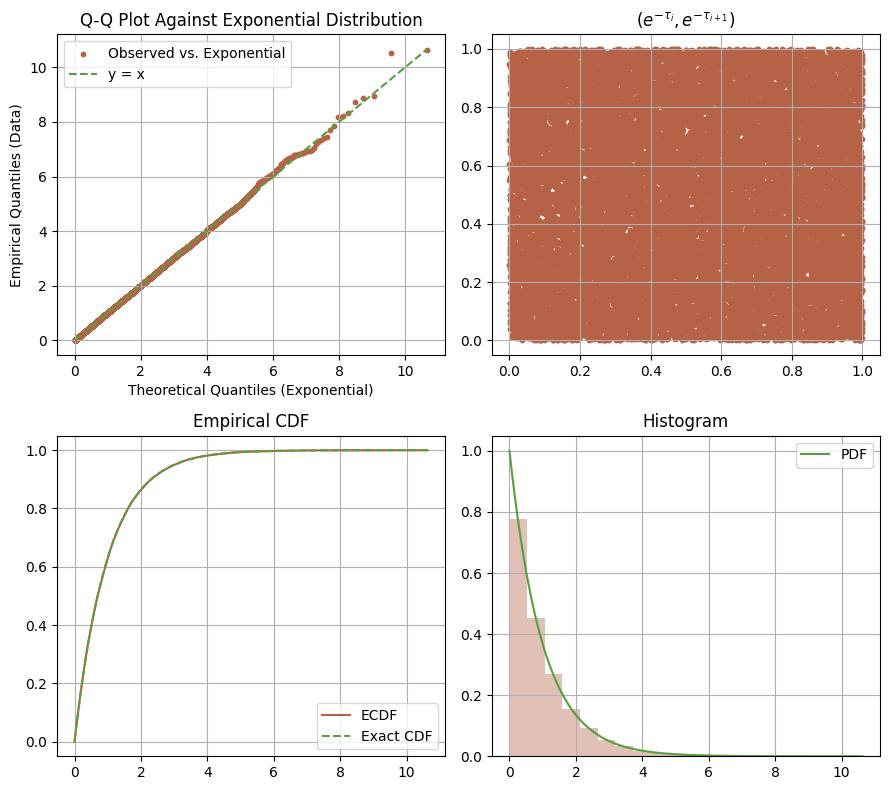

In [123]:
poisson_jumps_test(ivi_hawkes.U_from_jumps(hawkes_arrivals, hawkes_arrivals))

#### Ogata's algorithm

Assumptions:
- $g_0 \equiv \mu$
- $K$ is non-increasµing

In [124]:
kernel = ivi_hawkes.kernel
rng = np.random.default_rng(seed=41)

In [125]:
%%time
rng = np.random.default_rng(seed=42)
hawkes_arrivals = simulate_hawkes_ogata(T=T, mu=mu, kernel=kernel, rng=rng)
print("N_T =", len(hawkes_arrivals))

N_T = 4830
CPU times: total: 1.7 s
Wall time: 2.18 s


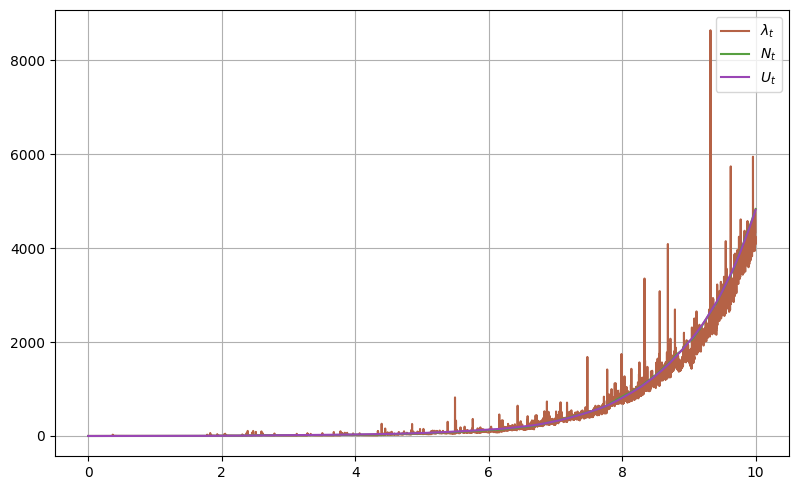

In [126]:
plt.plot(t_grid_fine, ivi_hawkes.lam_from_jumps(t_grid_fine, hawkes_arrivals), label="$\lambda_t$")
plt.plot(t_grid_fine, ivi_hawkes.N_from_jumps(t_grid_fine, hawkes_arrivals), label="$N_t$")
plt.plot(t_grid_fine, ivi_hawkes.U_from_jumps(t_grid_fine, hawkes_arrivals), label="$U_t$")
plt.legend()

Kolmogorov-Smirnov test p-value:  0.586017176503929


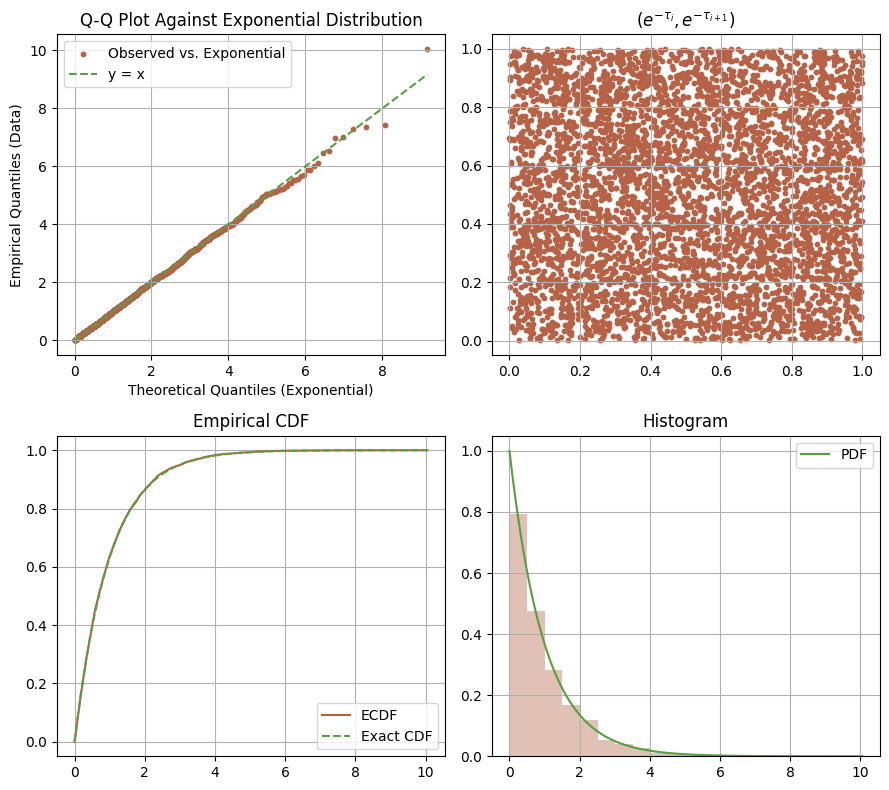

In [127]:
poisson_jumps_test(ivi_hawkes.U_from_jumps(hawkes_arrivals, hawkes_arrivals))

### Comparing marginal laws of $N_T$

In [93]:
H = 0.1
c = 0.95
lam = 1
alpha = 2
kernel = FractionalKernel(c=c, H=H)
#kernel = ExponentialKernel(c=c, lam=lam)
# kernel = GammaKernel(lam=lam, alpha=alpha, c=lam**alpha * 0.95)
rng = np.random.default_rng(seed=42)
T = 5

#### Population approach

In [94]:
%%time
n_paths = 10000
rng = np.random.default_rng(seed=42)

hawkes_arrivals_sample = [simulate_hawkes(T=T, g0=g0_const, g0_upper_bound=mu, kernel=kernel, rng=rng)
                          for _ in range(n_paths)]

N_T_sample = np.array([len(hawkes_arrivals) for hawkes_arrivals in hawkes_arrivals_sample])
U_T_sample = np.array([ivi_hawkes.U_from_jumps(np.array(T), hawkes_arrivals)[0] for hawkes_arrivals in hawkes_arrivals_sample])

CPU times: total: 38.3 s
Wall time: 54.1 s


#### Ogata

In [95]:
%%time
rng = np.random.default_rng(seed=42)

hawkes_arrivals_sample_ogata = [simulate_hawkes_ogata(T=T, mu=mu, kernel=kernel, rng=rng, batch_size=400)
                                for _ in range(n_paths)]

N_T_sample_ogata = np.array([len(hawkes_arrivals) for hawkes_arrivals in hawkes_arrivals_sample_ogata])
U_T_sample_ogata = np.array([ivi_hawkes.U_from_jumps(np.array(T), hawkes_arrivals)[0] for hawkes_arrivals in hawkes_arrivals_sample_ogata])

CPU times: total: 1min 41s
Wall time: 2min 18s


#### iVi

In [96]:
%%time

rng = np.random.default_rng(seed=42)
n_steps = 1000
t_grid = np.linspace(0, T, n_steps + 1)

ivi_hawkes = IVIHawkesProcess(kernel=kernel, g0_bar=g0_bar_const, rng=rng, g0=g0_const)
N, U, lam = ivi_hawkes.simulate_on_grid(t_grid=t_grid, n_paths=n_paths)

CPU times: total: 7.86 s
Wall time: 7.06 s


### Law of $N_T$

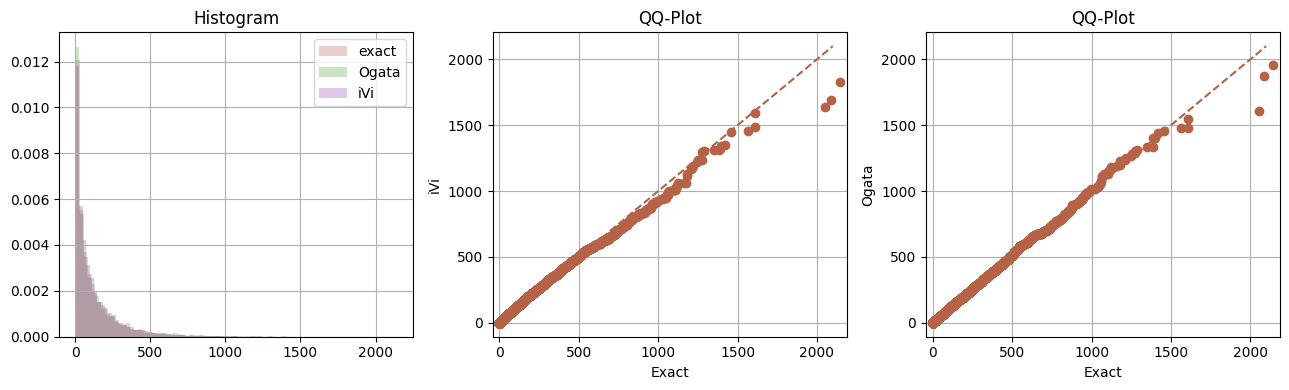

In [97]:
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot_2samples

fig, ax = plt.subplots(1, 3, figsize=(13, 4))

ax[0].hist(N_T_sample, density=True, bins=75, alpha=0.3, label="exact")
ax[0].hist(N_T_sample_ogata, density=True, bins=75, alpha=0.3, label="Ogata")
ax[0].hist(N[-1], density=True, bins=75, alpha=0.3, label="iVi")
ax[0].set_title("Histogram")
ax[0].legend()

qqplot_2samples(sm.ProbPlot(N_T_sample), sm.ProbPlot(N[-1]), ax=ax[1], xlabel="Exact", ylabel="iVi")
ax[1].plot(np.linspace(0, max(np.max(U_T_sample), np.max(U[-1])), 100), np.linspace(0, max(np.max(U_T_sample), np.max(U[-1])), 100), "--")
ax[1].set_title("QQ-Plot")

qqplot_2samples(sm.ProbPlot(N_T_sample), sm.ProbPlot(N_T_sample_ogata), ax=ax[2], xlabel="Exact", ylabel="Ogata")
ax[2].plot(np.linspace(0, max(np.max(U_T_sample), np.max(U[-1])), 100), np.linspace(0, max(np.max(U_T_sample), np.max(U[-1])), 100), "--")
ax[2].set_title("QQ-Plot")

plt.show()

### Law of $U_T$

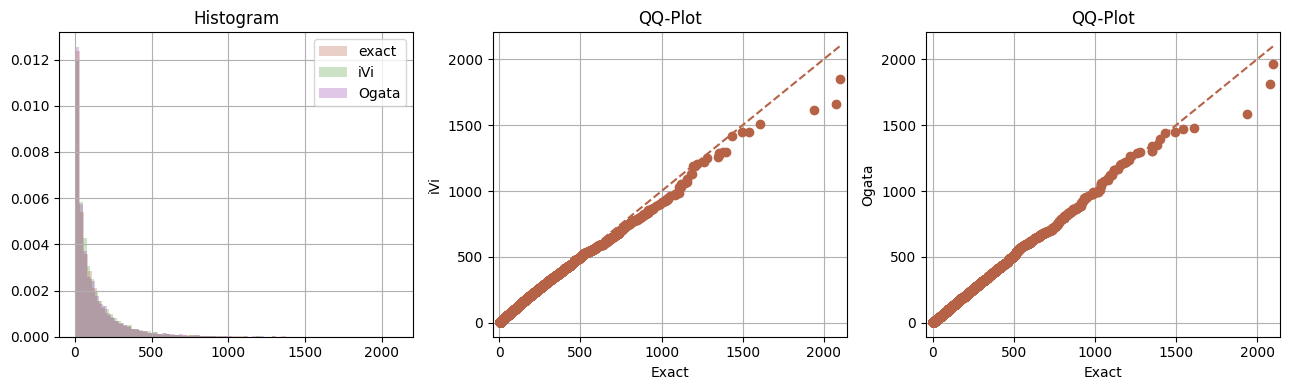

In [98]:
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot_2samples

fig, ax = plt.subplots(1, 3, figsize=(13, 4))

ax[0].hist(U_T_sample, density=True, bins=75, alpha=0.3, label="exact")
ax[0].hist(U[-1], density=True, bins=75, alpha=0.3, label="iVi")
ax[0].hist(U_T_sample_ogata, density=True, bins=75, alpha=0.3, label="Ogata")
ax[0].set_title("Histogram")
ax[0].legend()

qqplot_2samples(sm.ProbPlot(U_T_sample), sm.ProbPlot(U[-1]), ax=ax[1], xlabel="Exact", ylabel="iVi")
ax[1].plot(np.linspace(0, max(np.max(U_T_sample), np.max(U[-1])), 100), np.linspace(0, max(np.max(U_T_sample), np.max(U[-1])), 100), "--")
ax[1].set_title("QQ-Plot")

qqplot_2samples(sm.ProbPlot(U_T_sample), sm.ProbPlot(U_T_sample_ogata), ax=ax[2], xlabel="Exact", ylabel="Ogata")
ax[2].plot(np.linspace(0, max(np.max(U_T_sample), np.max(U[-1])), 100), np.linspace(0, max(np.max(U_T_sample), np.max(U[-1])), 100), "--")
ax[2].set_title("QQ-Plot")

plt.show()

In [101]:
ks_2samp(U_T_sample, U_T_sample_ogata)

KstestResult(statistic=0.0169, pvalue=0.1149640605104508, statistic_location=109.75991116485487, statistic_sign=1)

In [102]:
ks_2samp(U_T_sample, U[-1])

KstestResult(statistic=0.0328, pvalue=4.24728924053937e-05, statistic_location=62.321449237989995, statistic_sign=1)

## Conclusions
- Very good performance of iVi when $N_T \gg 1$
- Many timesteps are needed in stationary regime for exponential kernel. iVi becomes less efficient than other methods